In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns

In [2]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\batang.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**

1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.

In [3]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')

df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06


In [4]:
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.

In [5]:
df.isnull().sum()

OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    1
dtype: int64

In [6]:
print(df.isnull().sum())
mean_discount = df['DiscountRate'].mean()
df['DiscountRate'].fillna(mean_discount, inplace=True)
print(df.isnull().sum())

OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    1
dtype: int64
OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    0
dtype: int64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_1840\2769915123.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DiscountRate'].fillna(mean_discount, inplace=True)


3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [7]:
df.info()

df['OrderDate'] = pd.to_datetime(df['OrderDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  120 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       120 non-null    int64         
 1   Product       120 non-null    object        
 2   Categor

2. **매출 분석**

1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`

In [8]:
df['TotalRevenue'] = df['Quantity'] * df['Price']
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000
...,...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57:00,독일,0.20,33000
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37:00,대한민국,0.09,164000
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27:00,독일,0.09,33000
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 09:01:00,독일,0.06,86000


In [9]:
display(df.head())

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000


 2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1840\188145492.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M')['TotalRevenue'].sum()


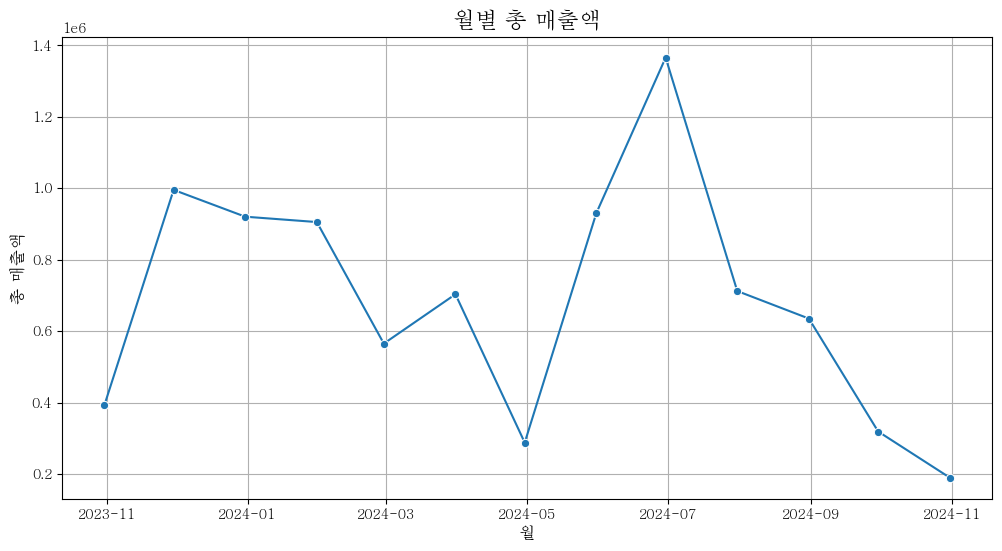

In [10]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['TotalRevenue'] = df['Quantity'] * df['Price']

df.set_index('OrderDate', inplace=True)

monthly_revenue = df.resample('M')['TotalRevenue'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o') 
plt.title('월별 총 매출액', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('총 매출액', fontsize=12)
plt.grid(True)
plt.show()

3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.

In [11]:
top_3_categories = df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False).head(3)
print(top_3_categories)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64


 4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [12]:
top_5_countries = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

print(top_5_countries)

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64


## 3. 고객 분석

 

### 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.

In [13]:
top_customer = df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
print(top_customer)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64


### 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.

In [14]:
top_customer = df.groupby('Quantity')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
print(top_customer)

Quantity
5    3080000
4    2316000
3    1866000
1     859000
2     798000
Name: TotalRevenue, dtype: int64


### 연령대에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
- 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [15]:
df['Birthdate'] = pd.to_datetime(df['Birthdate'])

current_year = 2025
df['Age'] = current_year - df['Birthdate'].dt.year

bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['10대이하', '20대', '30대', '40대', '50대', '60대이상']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_category_counts = df.groupby(['AgeGroup', 'Category']).size().unstack(fill_value=0)

top_category_by_age = age_category_counts.idxmax(axis=1)

print(top_category_by_age)

AgeGroup
10대이하         Beauty
20대           Beauty
30대             Food
40대            Books
50대      Electronics
60대이상    Electronics
dtype: object


C:\Users\Playdata\AppData\Local\Temp\ipykernel_1840\943076811.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_counts = df.groupby(['AgeGroup', 'Category']).size().unstack(fill_value=0)


4. **상품 분석**

1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.

In [16]:
category_sold_df = df.groupby('Category').agg(
    sold_count = ('OrderID', 'count')
).reset_index()

sorted_category_sold_df = category_sold_df.sort_values('sold_count', ascending=False)
sorted_category_sold_df.head(5)

,Category,sold_count
0,Beauty,23
4,Food,23
1,Books,22
3,Electronics,19
5,Sports,18


2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.

In [17]:
sold_product_per_category = df.groupby(['Category','Product']).agg(
    sold_count = ('OrderID', 'count')
).reset_index()

top_sold_product_per_category = sold_product_per_category.loc[sold_product_per_category.groupby('Category')['sold_count'].idxmax()]
display(top_sold_product_per_category)

,Category,Product,sold_count
1,Beauty,립스틱,7
7,Books,소설,7
10,Clothing,셔츠,7
14,Electronics,노트북,5
19,Food,과자,6
28,Sports,축구공,5


3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [18]:
product_sold = df.groupby('Product').agg(
    mean_quantity = ('Quantity', 'mean')
).reset_index()

product_sold.sort_values('mean_quantity', ascending=False).head(3)

,Product,mean_quantity
20,주스,5.0
17,자기계발,5.0
15,요가매트,4.0


5. **시간 분석**

1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.

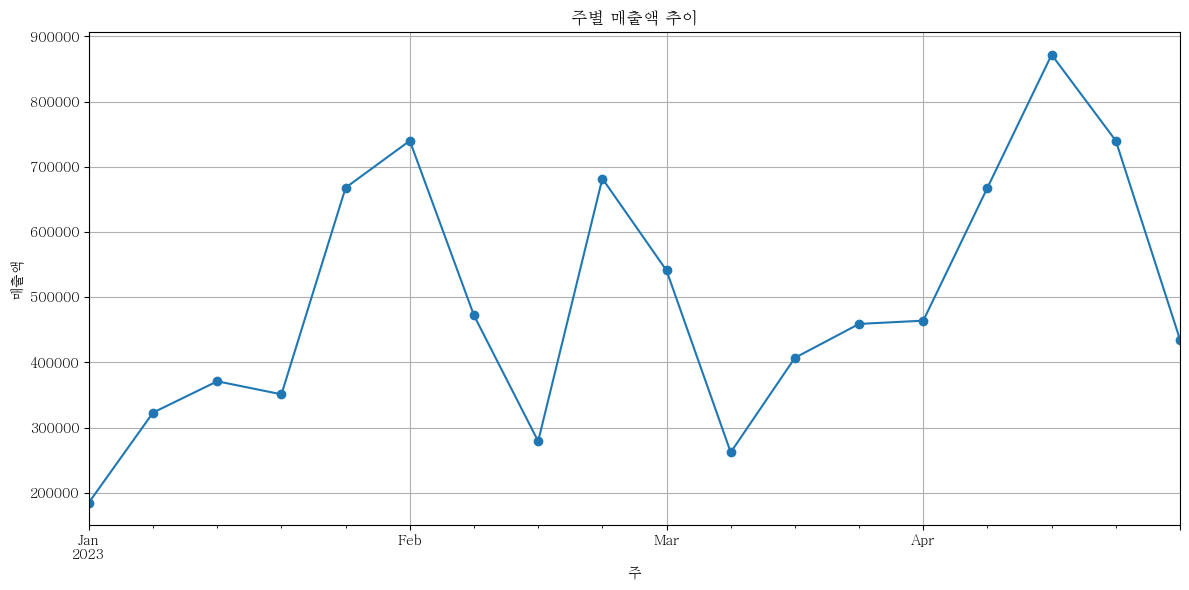

In [19]:
df['TotalRevenue'] = df['Quantity'] * df['Price']
df['OrderDate'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

df.set_index('OrderDate', inplace=True)

weekly_revenue = df['TotalRevenue'].resample('W').sum()

plt.figure(figsize=(12,6))
weekly_revenue.plot(marker='o')
plt.title('주별 매출액 추이')
plt.xlabel('주')
plt.ylabel('매출액')
plt.grid(True)
plt.tight_layout()
plt.show()

2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.

OrderDate
2024-01-31    1.650810e+06
2024-02-29    1.846803e+06
2024-03-31    1.564910e+06
2024-04-30    2.304090e+06
Freq: ME, Name: TotalPrice, dtype: float64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_1840\1875175820.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


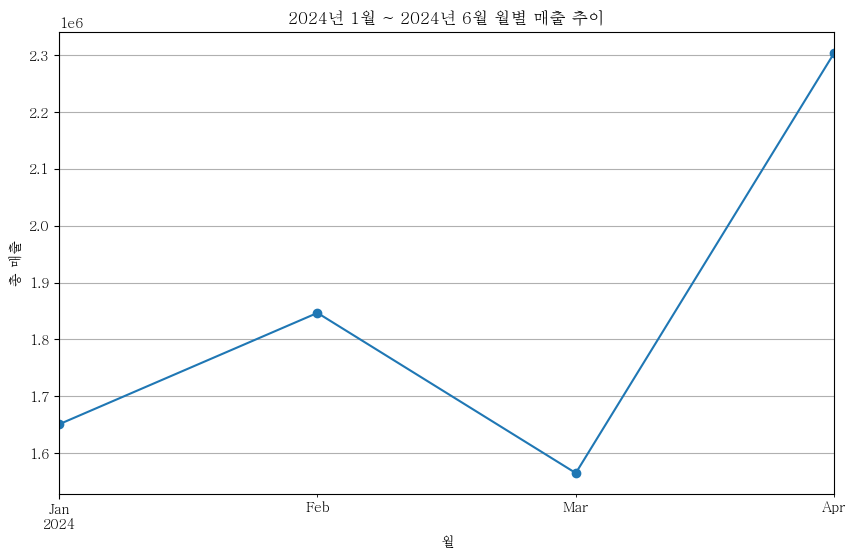

In [20]:
monthly_sales = (
    df.assign(
        OrderDate=lambda df: pd.date_range(start='2024-01-01', periods=len(df), freq='D'),
        TotalPrice=lambda df: df['Quantity'] * df['Price'] * (1 - df['DiscountRate'].fillna(0))
    )
    .set_index('OrderDate')
    .loc['2024-01':'2024-06', 'TotalPrice']
    .resample('M')
    .sum()
)

monthly_sales.plot(
    kind='line', marker='o', figsize=(10, 6), grid=True,
    title='2024년 1월 ~ 2024년 6월 월별 매출 추이',
    xlabel='월', ylabel='총 매출', rot=0
)

print(monthly_sales)

3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

OrderHour
1     1
2     1
3     1
6     1
7     1
9     1
11    4
13    1
14    2
17    2
20    1
22    1
Name: count, dtype: int64


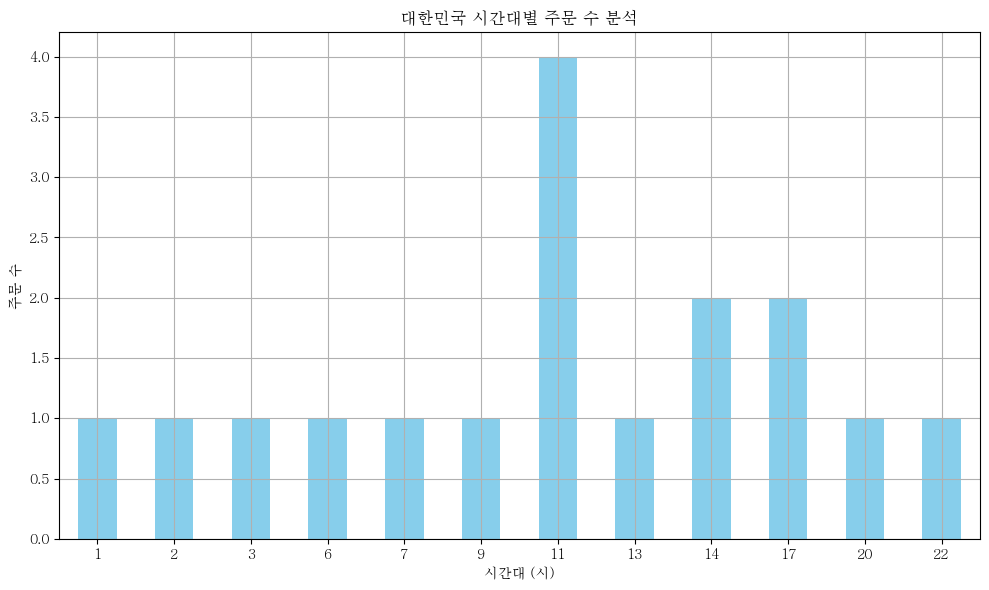

In [21]:
np.random.seed(42)

hourly_orders = (
    df.assign(
        OrderHour=(
            pd.to_datetime(pd.date_range(start='2023-01-01', periods=len(df), freq='D')) +
            pd.to_timedelta(np.random.randint(0, 24, size=len(df)), unit='h')
        ).hour
    )
    .query("Country == '대한민국'")
    ['OrderHour']
    .value_counts()
    .sort_index()
)

ax = hourly_orders.plot(
    kind='bar',
    figsize=(10, 6),
    title='대한민국 시간대별 주문 수 분석',
    xlabel='시간대 (시)',
    ylabel='주문 수',
    color='skyblue',
    rot=0,
    grid=True
)
plt.tight_layout()

print(hourly_orders)

6. **추가 분석**

1. 고객의 **재구매율**을 분석하세요.
 - 재구매율 = 한 고객이 여러 번 주문한 비율

In [22]:
repurchase_rate = (df['CustomerID'].value_counts() > 1).sum() / df['CustomerID'].nunique()

print(f"재구매율은 {repurchase_rate:.2%} 입니다.")

재구매율은 8.11% 입니다.


2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

카테고리별 매출액 및 평균 할인율 (할인율 높은 순)
               TotalSales  AvgDiscountRate
Category                                  
Beauty       1.209380e+06         0.186522
Sports       8.666800e+05         0.179444
Electronics  1.453730e+06         0.175789
Food         1.610223e+06         0.174099
Books        1.166780e+06         0.170000
Clothing     1.059820e+06         0.154000


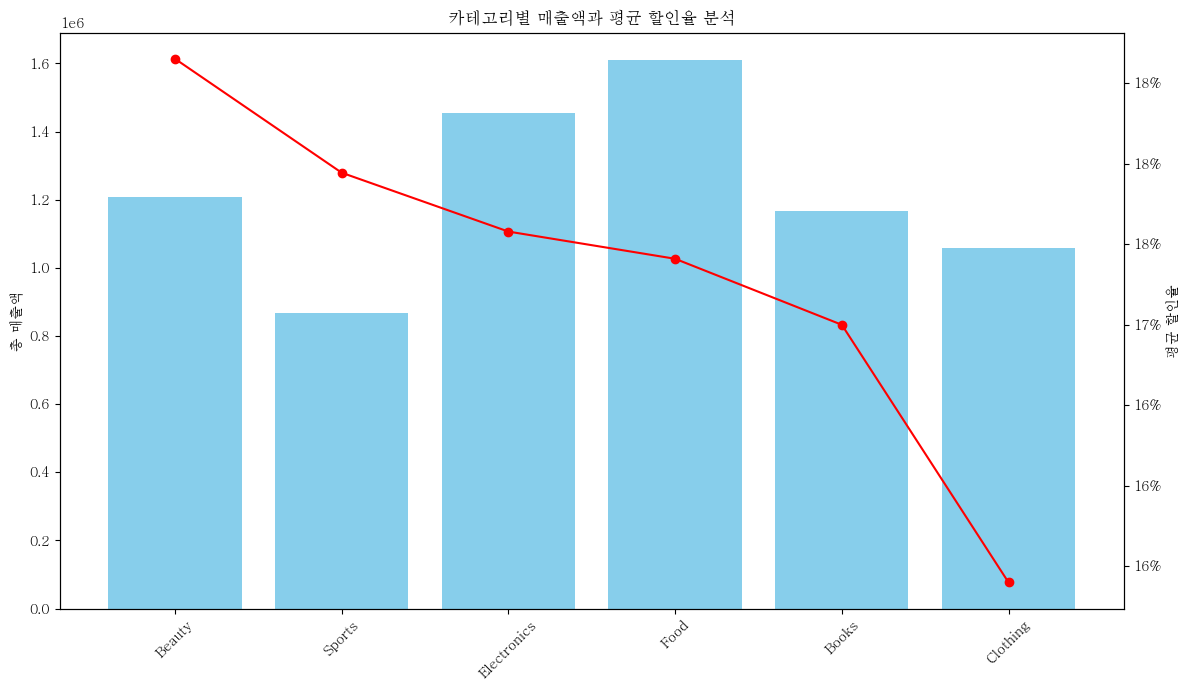

In [23]:
category_analysis = (
    df.assign(
        TotalPrice=lambda df: df['Quantity'] * df['Price'] * (1 - df['DiscountRate'].fillna(0))
    )
    .groupby('Category')
    .agg(
        TotalSales=('TotalPrice', 'sum'),
        AvgDiscountRate=('DiscountRate', 'mean')
    )
    .sort_values(by='AvgDiscountRate', ascending=False)
)

print("카테고리별 매출액 및 평균 할인율 (할인율 높은 순)")
print(category_analysis)

fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.bar(category_analysis.index, category_analysis['TotalSales'], color='skyblue', label='총 매출액')
ax1.set_ylabel('총 매출액')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(category_analysis.index, category_analysis['AvgDiscountRate'], color='r', marker='o', label='평균 할인율')
ax2.set_ylabel('평균 할인율')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.title('카테고리별 매출액과 평균 할인율 분석')
fig.tight_layout()